<a href="https://colab.research.google.com/github/AlexeyTri/MyMachineLearningSeminars/blob/main/sem2/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80_%D0%B8_%D1%81%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB=False


if IN_COLAB:
    
    !wget -q -O requirements.txt https://raw.githubusercontent.com/andriygav/MachineLearningSeminars/master/sem2/requirements.txt
    !pip install -q -r requirements.txt
    

     |████████████████████████████████| 35.7 MB 209 kB/s 
     |████████████████████████████████| 208 kB 32.2 MB/s 
     |████████████████████████████████| 10.1 MB 38.6 MB/s 
     |████████████████████████████████| 68 kB 4.8 MB/s 
     |████████████████████████████████| 25.2 MB 46.2 MB/s 
     |████████████████████████████████| 14.5 MB 39.8 MB/s 
     |████████████████████████████████| 831.4 MB 2.1 kB/s 
     |████████████████████████████████| 6.8 MB 42.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
xarray 0.20.2 requires pandas>=1.1, but you have pandas 1.0.5 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.9.0 which

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.special import expit
from tqdm.notebook import tqdm
import seaborn as sns
import pandas as pd
import torch

from sklearn.linear_model import (LogisticRegression, LinearRegression)
from sklearn.model_selection import LeaveOneOut, KFold


In [ ]:
import numpy as np

In [ ]:
w = torch.ones(3, requires_grad=True)

q = w.T@w
q.backward()
print(w.grad)

tensor([2., 2., 2.])


In [ ]:
np.random.seed(0)
l = 40

# ГЕНЕРАЦИЯ ДАННЫХ 
x = np.linspace(0, 30, num=l)
Y = x + 4*np.sin(x) + 3 *np.random.randn(l)

# Генерация признаков
X = np.vstack([np.ones_like(x), x, np.sin(x)]).T

#Аналитическое решение
w = np.linalg.inv(X.T@X)@X.T@Y

In [ ]:
w

array([2.40304643, 0.90236995, 3.92967158])

<function matplotlib.pyplot.show>

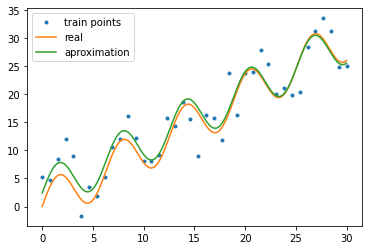

In [ ]:
plt.plot(x, Y, ".", label="train points")

x_plot = np.linspace(0, 30, num=10000)
plt.plot(x_plot, 4*np.sin(x_plot) + x_plot, label="real" )

X_plot = np.vstack([np.ones_like(x_plot), x_plot, np.sin(x_plot)]).T
plt.plot(x_plot, X_plot@w, label="aproximation")

plt.legend(loc="best")
plt.show

<function matplotlib.pyplot.show>

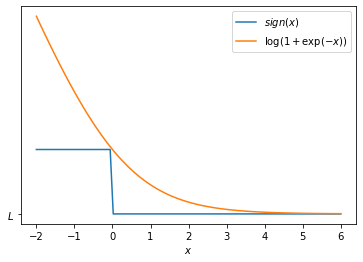

In [ ]:
def sign(x):
    return np.array(x <= 0, dtype=np.int64)

def upper_bound(x):
    return np.log2(1 + np.exp(-x))

x = np.linspace(-2, 6, 100)
plt.plot(x, sign(x), label="$sign(x)$")
plt.plot(x, upper_bound(x), label="$\log(1+\exp(-x))$")

plt.xlabel('$x$')
plt.plot("$L$")
plt.legend(loc="best")
plt.show

Задача бинарной классификации

In [ ]:
torch.manual_seed(0)

l= 100
n=2

X = torch.randn([l, n])
w_true = torch.randn([n])
Y = torch.ones([l])

Y[X@w_true < 0 ] = -1

In [ ]:
torch.manual_seed(0)
np.random.seed(0)
w = torch.randn([n], requires_grad=True) #

K = l
list_of_loss_sqrt = []
for k in range(1, K+1):
    # считаем ошибку L на каждом шаге
    with torch.no_grad():
        list_of_loss_sqrt.append(
            torch.mean(torch.log2(1 + torch.exp(-Y*(X@w))))
        )
    # выбираем случайный элемент выборки
    ind = np.random.randint(low=0, high=l)
    alpha = 1/np.sqrt(k)
    print(w)

    # считаем ошибку на элементе
    q = torch.log2(1 + torch.exp(-Y[ind] * (X[ind]@w)))
    print(q)

    # считаме q с крышкой
    q.backward()
    print(w.grad)

    # делаем градиентый шаг
    with torch.no_grad():
        w.add_(w.grad, alpha=-1 * alpha)
    
    # обнуляем градиент
    w.grad.zero_()

tensor([ 1.5410, -0.2934], requires_grad=True)
tensor(0.4311, grad_fn=<Log2Backward>)
tensor([-0.0917,  0.8581])
tensor([ 1.6327, -1.1515], requires_grad=True)
tensor(0.5522, grad_fn=<Log2Backward>)
tensor([0.0154, 0.3258])
tensor([ 1.6218, -1.3819], requires_grad=True)
tensor(0.5118, grad_fn=<Log2Backward>)
tensor([-0.3806, -0.1805])
tensor([ 1.8415, -1.2777], requires_grad=True)
tensor(0.0102, grad_fn=<Log2Backward>)
tensor([-0.0198,  0.0108])
tensor([ 1.8514, -1.2831], requires_grad=True)
tensor(0.0099, grad_fn=<Log2Backward>)
tensor([-0.0193,  0.0105])
tensor([ 1.8601, -1.2878], requires_grad=True)
tensor(1.0234, grad_fn=<Log2Backward>)
tensor([0.4153, 0.5816])
tensor([ 1.6905, -1.5252], requires_grad=True)
tensor(0.7733, grad_fn=<Log2Backward>)
tensor([-0.4556, -0.3701])
tensor([ 1.8627, -1.3853], requires_grad=True)
tensor(0.6249, grad_fn=<Log2Backward>)
tensor([-0.1469,  0.0266])
tensor([ 1.9147, -1.3947], requires_grad=True)
tensor(0.1311, grad_fn=<Log2Backward>)
tensor([-0.204

In [ ]:
pred = torch.ones([l])
pred[X@w <0] = -1
print('точность прогноза : {}'.format(torch.mean((pred == Y).float()).item()))

точность прогноза : 0.9200000166893005


In [ ]:
torch.manual_seed(0)
np.random.seed(0)
w = torch.randn([n], requires_grad=True)

K = l
list_of_loss = []
for k in range(1, K+1):
    with torch.no_grad():
        list_of_loss.append(torch.mean(torch.log2(1+ torch.exp(-Y*(X@w)))))
    
    ind = np.random.randint(low=1, high=l)
    alpha = 1/k

    q = torch.log2(1 + torch.exp(-Y[ind] * (X[ind]@w)))
    q.backward()

    with torch.no_grad():
        w.add_(w.grad, alpha=-1 * alpha)
    
    w.grad.zero_()
    

In [ ]:
torch.manual_seed(0)
w = torch.randn([n], requires_grad=True)

dataset = torch.utils.data.TensorDataset(X,Y)
generator = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

optimizer = torch.optim.SGD([w], lr=1)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lambda k: 1/np.sqrt(k+1))

list_of_loss_torch = []
for x, y in generator:
    optimizer.zero_grad() # обнуляем градиенты

    with torch.no_grad():
        list_of_loss_torch.append(
            torch.mean(torch.log2(1 + torch.exp(-Y*(X@w))))
        )

    q = torch.log2(1 + torch.exp(-y*(x@w))).mean()

    q.backward()

    optimizer.step()
    scheduler.step()

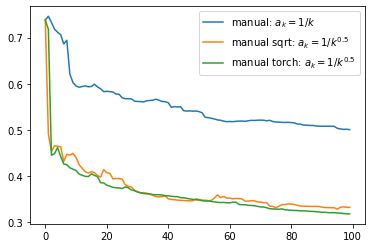

In [ ]:
plt.plot(list_of_loss, label="manual: $a_k = 1/k$")
plt.plot(list_of_loss_sqrt, label="manual sqrt: $a_k = 1/k^{0.5}$")
plt.plot(list_of_loss_torch, label="manual torch: $a_k = 1/k^{0.5}$")
plt.legend(loc="best")
plt.show()

In [ ]:
np.random.seed(0)
l = 50000
n = 2

X = np.random.randn(l, n)
w = np.random.randn(n)
Y = np.random.binomial(n=1, p=expit(X@w))

In [ ]:
gammas = [1e-10, 1e-4, 1e-3, 1e-2, .1, 1., 10., 1e2, 1e3, 1e4, 1e10]

models_l2 = dict()
for gamma in gammas:
    model = LogisticRegression(penalty='l2', C=2/gamma, fit_intercept=False, 
                               random_state=0, solver='saga')
    model.fit(X, Y)
    models_l2[gamma] = model
    
models_l1 = dict()
for gamma in gammas:
    model = LogisticRegression(penalty='l1', C=2/gamma, fit_intercept=False, 
                               random_state=0, solver='saga')
    model.fit(X, Y)
    models_l1[gamma] = model

NameError: ignored

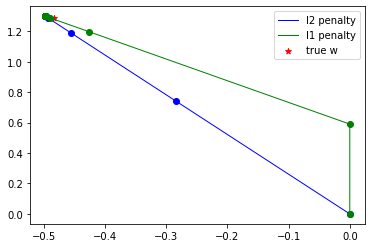

In [ ]:
x = [models_l2[gamma].coef_[0][0] for gamma in models_l2]
y = [models_l2[gamma].coef_[0][1] for gamma in models_l2]

plt.plot(x, y, 'bo')
plt.plot(x, y, 'b-', linewidth=1, label='l2 penalty')

x = [models_l1[gamma].coef_[0][0] for gamma in models_l1]
y = [models_l1[gamma].coef_[0][1] for gamma in models_l1]

plt.plot(x, y, 'go')
plt.plot(x, y, 'g-', linewidth=1, label='l1 penalty')
    
    
plt.scatter(w[0], w[1], marker='*', c='r', label='true w')
plt.legend(loc='best')
plt.show()

 как выбрать необходимую ГАММА?

In [ ]:
np.random.seed(0)
l = 1000
n = 2

X_train = np.random.randn(l , n)
X_test = np.random.randn(500, n)
w = np.random.randn(n)
Y_train = np.random.binomial(n = 1, p=expit(X_train@w))
Y_test = np.random.binomial(n=1, p=expit(X_test@w))

In [ ]:
gammas = [1e-10, 1e-4, 1e-3, 1e-2, .1, 1., 10., 1e2, 1e3, 1e4, 1e10]
kf = KFold(n_splits=3)
number_of_batch = kf.get_n_splits(X_train)

gamma_scores = dict()
for gamma in tqdm(gammas):
    list_of_scores= []
    for train_index, test_index in tqdm(kf.split(X_train), total=number_of_batch, leave=False):
        x_train, x_test = X_train[train_index],X_train[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]
        model = LogisticRegression(penalty="l2", C=2/gamma, solver="saga",fit_intercept=False, random_state=0)
        model.fit(x_train, y_train)
        list_of_scores.append(model.score(x_test, y_test))

    gamma_scores[gamma] = np.mean(list_of_scores) 


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
loo = LeaveOneOut()
number_of_batch = loo.get_n_splits(X_train)

gamma_scores = dict()
for gamma in tqdm(gammas):
    list_of_scores= []
    for train_index, test_index in tqdm(loo.split(X_train), total=number_of_batch, leave=False):
        x_train, x_test = X_train[train_index],X_train[test_index]
        y_train, y_test = Y_train[train_index], Y_train[test_index]
        model = LogisticRegression(penalty="l2", C=2/gamma, solver="saga",fit_intercept=False, random_state=0)
        model.fit(x_train, y_train)
        list_of_scores.append(model.score(x_test, y_test))

    gamma_scores[gamma] = np.mean(list_of_scores) 

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
best_gamma = sorted(gamma_scores, key=lambda x: gamma_scores[x], reverse=True)[0]

model = LogisticRegression(penalty="l2", C=2/best_gamma, fit_intercept=False, random_state=0, solver='saga')
model.fit(X_train, Y_train)
print('Точность: {}'.format(model.score(X_test, Y_test)))

Точность: 0.766


In [ ]:
def get_line(a, b, c=0, x_min=-10, x_max=10):
    x1, y1 = -(-b + c)/a, -1
    x2, y2 = -(b + c)/a, 1
    
    polynomial = np.poly1d(np.polyfit([x1, x2], [y1, y2], 1))
    x_axis = np.linspace(x_min, x_max)
    y_axis = polynomial(x_axis)
    
    return x_axis, y_axis

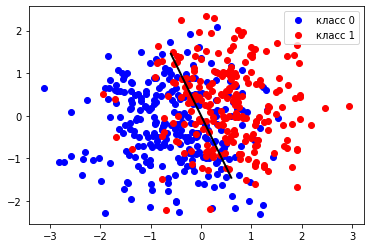

In [ ]:
cols = ['blue', 'red']

for k in np.unique(Y_test):
    plt.plot(X_test[Y_test==k,0], X_test[Y_test==k,1], 'o', 
             label='класс {}'.format(k), color=cols[k])

plt.plot(*get_line(*model.coef_[0], x_min=-0.6, x_max=0.6), 
         linewidth=2, color='black')

plt.legend(loc='best')
plt.show()
